## Carregando os dados e importando as dependencias

In [3]:
# 1. Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy.io import arff  # <- necessário para ler ARFF

# 3. Carregar o arquivo ARFF
data, meta = arff.loadarff('/content/drive/My Drive/Datasets/diabetes.arff')
df = pd.DataFrame(data)

# 4. Converter a coluna 'class' de bytes para string
df['class'] = df['class'].apply(lambda x: x.decode('utf-8'))

# 5. Visualizar as primeiras linhas
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


preg   plas  pres  skin   insu  mass   pedi   age            class
0   6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0  tested_positive
1   1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0  tested_negative
2   8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0  tested_positive
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0  tested_negative
4   0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0  tested_positive

Pré-processamento: Não temos atributos irrelevantes para deletar

Pré-processamento: tratamento de atributos com valores ausentes

In [4]:
def trataFaltantes(df):
    '''
    Substitui valores faltantes pela média dos outros valores do mesmo atributo
    de amostras que sejam da mesma classe (class).
    '''
    for col in df.columns:
        if col == 'class':
            continue  # Não trata a coluna de classe
        for classe in df['class'].unique():
            mask = (df['class'] == classe) & (df[col].isnull())
            media = df.loc[(df['class'] == classe) & (~df[col].isnull()), col].mean()
            df.loc[mask, col] = media
    return df

# Antes, visualize as linhas com valores ausentes
idxRowNan = pd.isnull(df).any(axis=1).to_numpy().nonzero()
print("Amostras com valores ausentes:")
display(df.iloc[idxRowNan])

# Aplica a função
df = trataFaltantes(df)

# Depois, visualize as mesmas linhas
print("\nAmostras que possuíam valores ausentes (após tratamento):")
display(df.iloc[idxRowNan])

Amostras com valores ausentes:


Empty DataFrame
Columns: [preg, plas, pres, skin, insu, mass, pedi, age, class]
Index: []


Amostras que possuíam valores ausentes (após tratamento):


Empty DataFrame
Columns: [preg, plas, pres, skin, insu, mass, pedi, age, class]
Index: []

## Pré-processamento: tratamento de dados inconsistentes ou redundantes

In [5]:
# Identifica duplicatas (todas as colunas exceto 'class')
atributos = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']

df_duplicates = df[df.duplicated(subset=atributos, keep=False)]

if len(df_duplicates) > 0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem valores duplicados')

Não existem valores duplicados


## Identificando duplicatas e inconsistências e removendo

In [6]:
def delDuplicatas(df):
    '''
    Para cada grupo de amostras duplicadas, mantém uma e apaga as demais
    '''
    df = df.drop_duplicates(keep='first')
    return df

df = delDuplicatas(df)
display(df)

preg   plas  pres  skin   insu  mass   pedi   age            class
0     6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0  tested_positive
1     1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0  tested_negative
2     8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0  tested_positive
3     1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0  tested_negative
4     0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0  tested_positive
..    ...    ...   ...   ...    ...   ...    ...   ...              ...
763  10.0  101.0  76.0  48.0  180.0  32.9  0.171  63.0  tested_negative
764   2.0  122.0  70.0  27.0    0.0  36.8  0.340  27.0  tested_negative
765   5.0  121.0  72.0  23.0  112.0  26.2  0.245  30.0  tested_negative
766   1.0  126.0  60.0   0.0    0.0  30.1  0.349  47.0  tested_positive
767   1.0   93.0  70.0  31.0    0.0  30.4  0.315  23.0  tested_negative

[768 rows x 9 columns]

## Detectando inconsistências (mesmos atributos, classes diferentes)

In [7]:
df_duplicates = df[df.duplicated(subset=atributos, keep=False)]

if len(df_duplicates) > 0:
    print('\nAmostras inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem amostras inconsistentes')

Não existem amostras inconsistentes


## Removendo inconsistências se caso conter.

In [8]:
def delInconsistencias(df):
    '''
    Remove todas as amostras inconsistentes da base de dados
    '''
    df = df.drop_duplicates(subset=atributos, keep=False)
    return df

df = delInconsistencias(df)

# Verifica se ainda existem duplicatas/inconsistências
df_duplicates = df[df.duplicated(subset=atributos, keep=False)]
if len(df_duplicates) > 0:
    display(df_duplicates)
else:
    print('Não existem amostras redundantes ou inconsistentes')

Não existem amostras redundantes ou inconsistentes


## Exibindo as estatísticas da base de dados.

In [9]:
df_detalhes = df.describe()
display(df_detalhes)

preg        plas        pres        skin        insu        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age  
count  768.000000  768.000000  
mean     0.471876   33.240885  
std      0.331329   11.760232  
min      0.078000   21.000000  
25%      0.243750   24.000000  
50%      0.372500   29.000000  
75%      0.626250   41.000000  
max      2.420000   81.000000

## Pré-processamento, realizando a normalização dos atributos.

In [10]:
def normalizar(X):
    m, n = X.shape
    X_norm = np.random.rand(m, n)
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    for i in range(m):
        X_norm[i, :] = (X[i, :] - mu) / sigma
    return X_norm, mu, sigma

X = df.iloc[:, 0:-1].values
X_norm, mu, sigma = normalizar(X)
df.iloc[:, 0:-1] = X_norm

print('\nPrimeira amostra da base antes da normalização: [%2.4f %2.4f].' % (X[0,0], X[0,1]))
print('\nApós a normalização, espera-se que a primeira amostra seja igual a: [-0.5747 0.1804].')
print('\nPrimeira amostra da base após normalização: [%2.4f %2.4f].' % (X_norm[0,0], X_norm[0,1]))


Primeira amostra da base antes da normalização: [6.0000 148.0000].

Após a normalização, espera-se que a primeira amostra seja igual a: [-0.5747 0.1804].

Primeira amostra da base após normalização: [0.6395 0.8478].


## Após a normalização, vou apresentar a estatística da base de dados novamente.

In [11]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df.describe()

display(df_detalhes.round(8))

preg        plas        pres        skin        insu        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean    -0.000000   -0.000000    0.000000    0.000000   -0.000000    0.000000   
std      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
min     -1.141108   -3.781190   -3.570271   -1.287373   -0.692439   -4.057829   
25%     -0.844335   -0.684790   -0.367098   -1.287373   -0.692439   -0.595191   
50%     -0.250789   -0.121808    0.149543    0.154433   -0.427783    0.000941   
75%      0.639530    0.605376    0.562856    0.718617    0.411740    0.584390   
max      3.904034    2.442886    2.732747    4.918660    6.648507    4.452906   

             pedi         age  
count  768.000000  768.000000  
mean     0.000000    0.000000  
std      1.000000    1.000000  
min     -1.188778   -1.040871  
25%     -0.688520   -0.785774  
50%     -0.299933   -0.360612  
75%      0.465923    0.659776  
max      5.879733    4.061069

## Pré-processamento: Iniciando a detecção de outliers

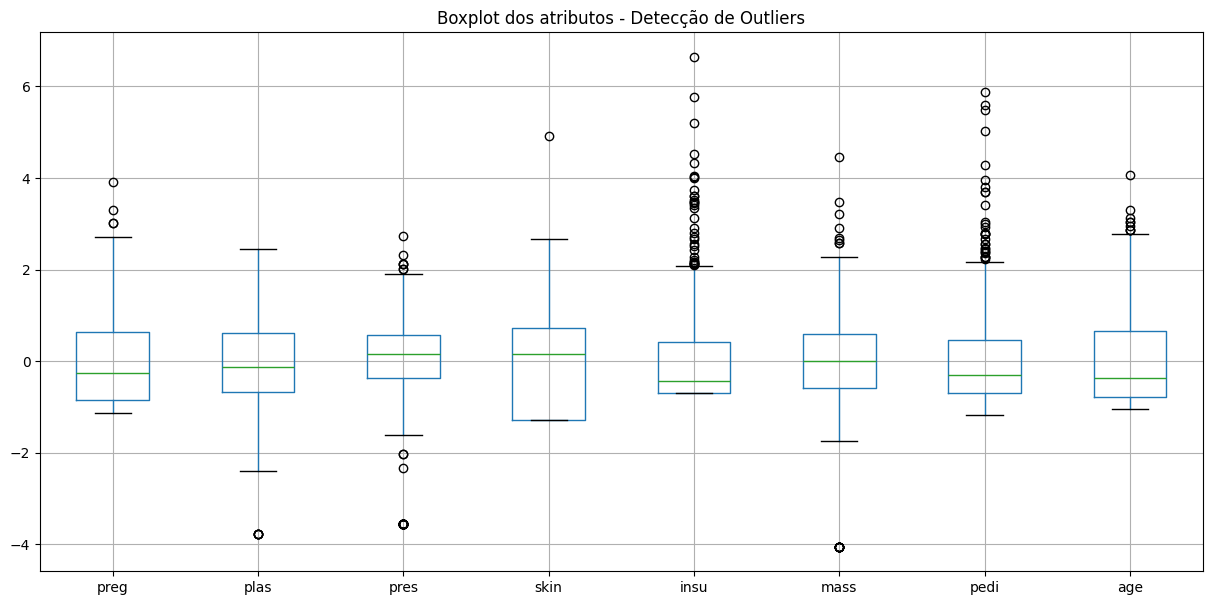

In [12]:
# Gera um boxplot para cada atributo numérico
df.boxplot(figsize=(15,7))
plt.title("Boxplot dos atributos - Detecção de Outliers")
plt.show()

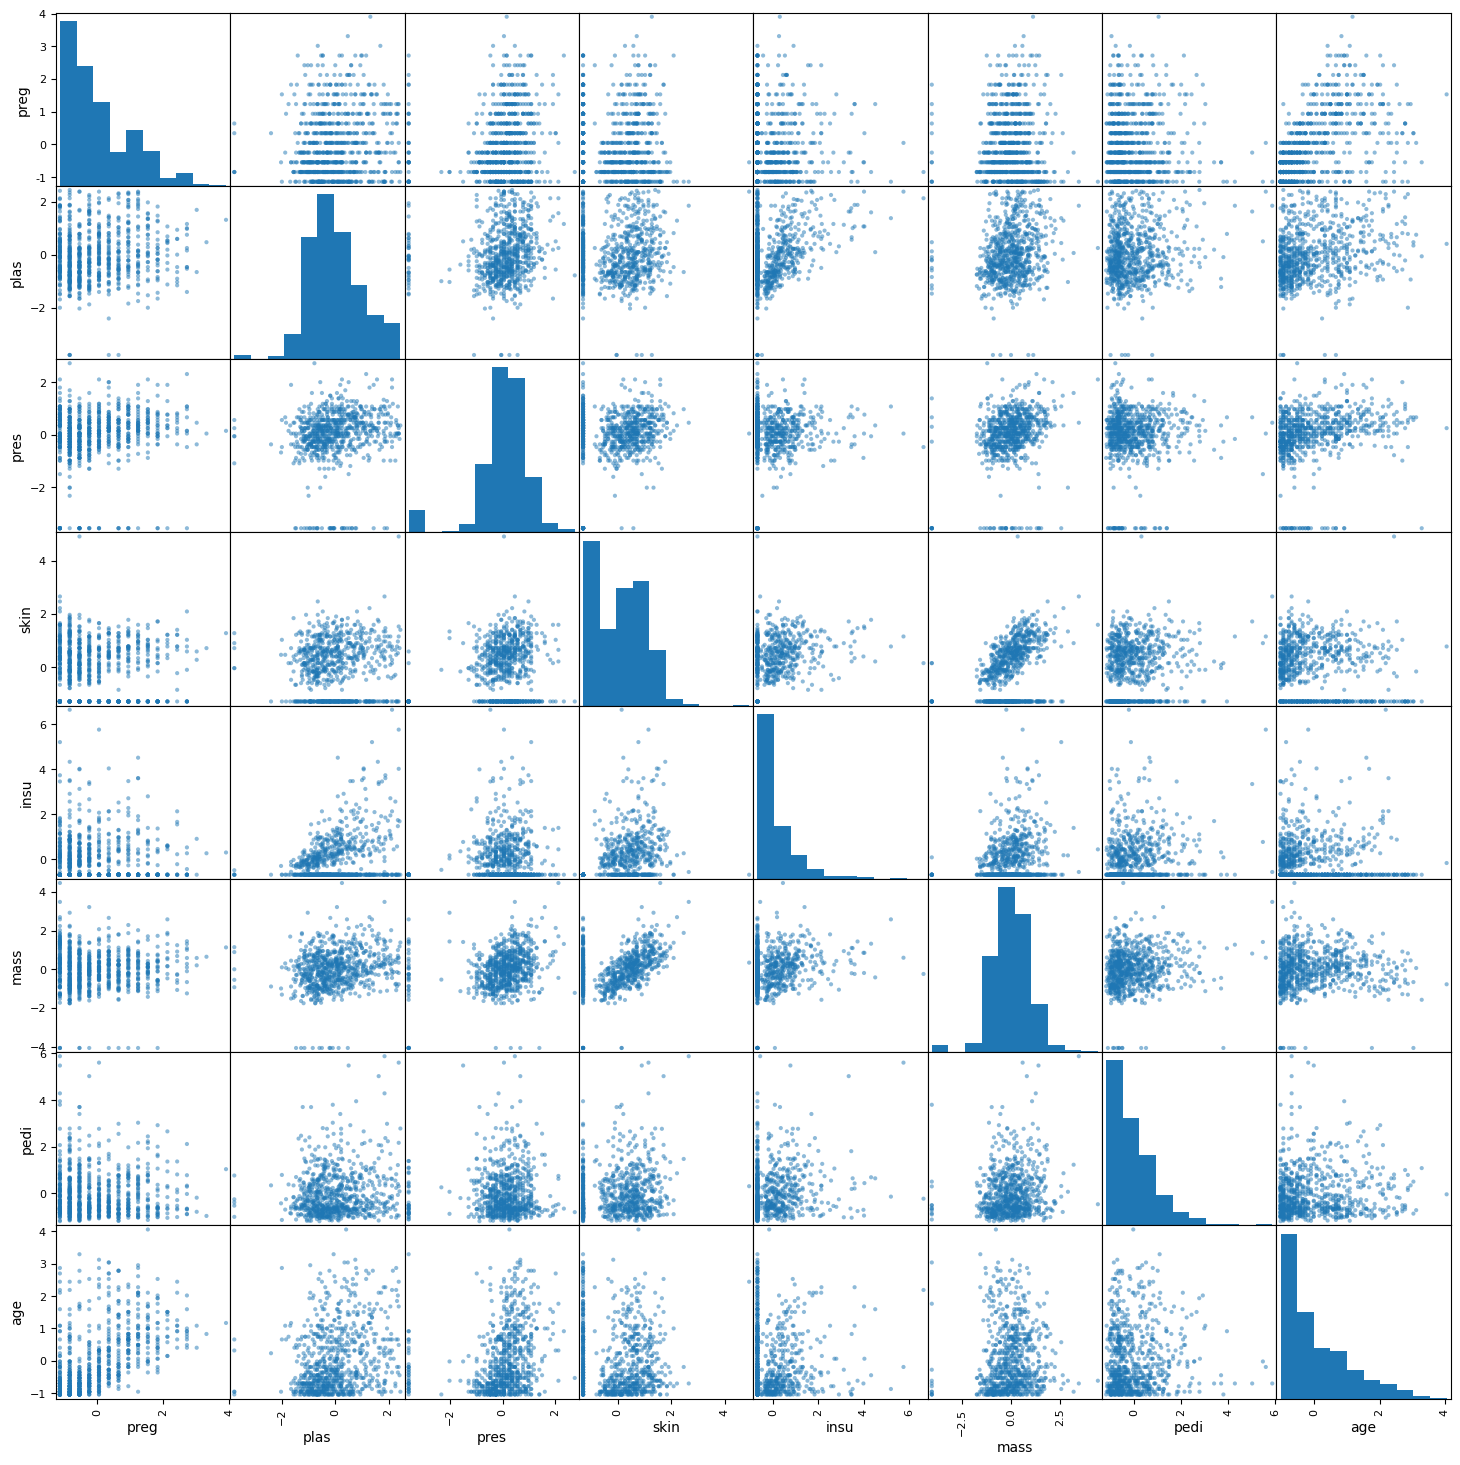

In [13]:
pd.plotting.scatter_matrix(df, figsize=(18,18))
plt.show()

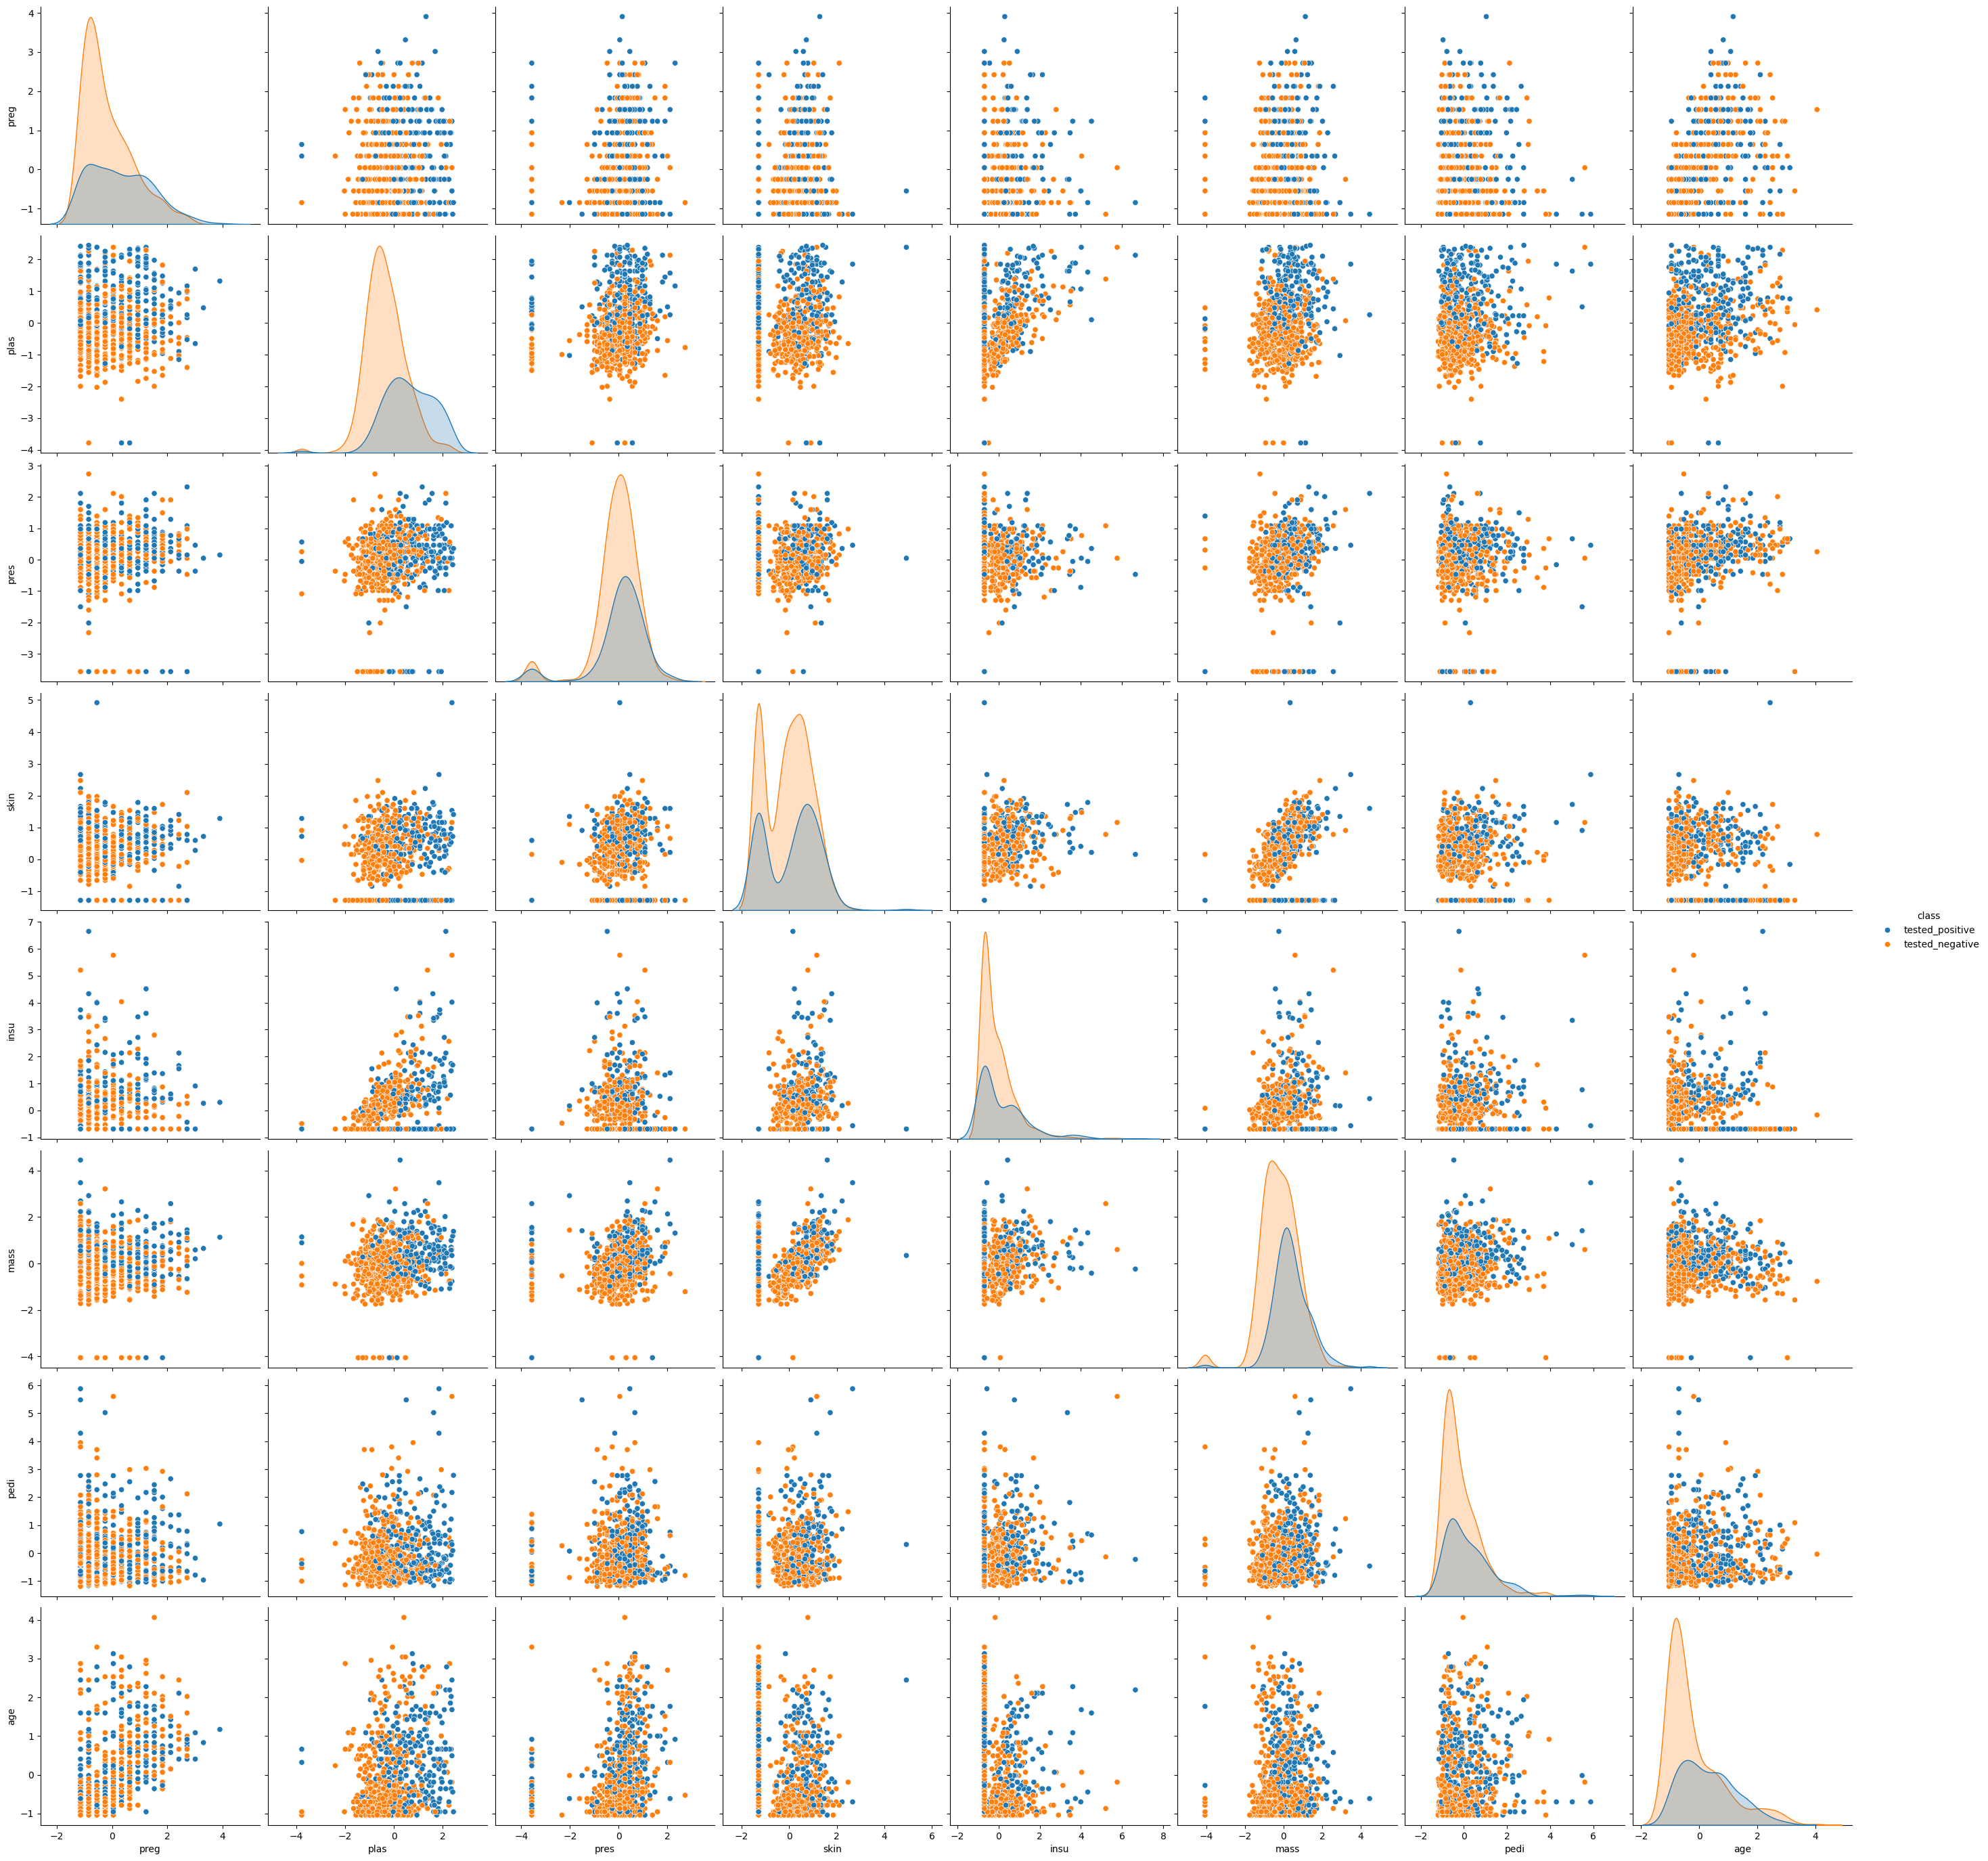

In [14]:
# matriz de gráficos scatter
sns.pairplot(df, hue='class', height=3.5)

# mostra o gráfico usando a função show() da matplotlib
plt.show()

## Analisando relações, ex: GLICOSE E IMC

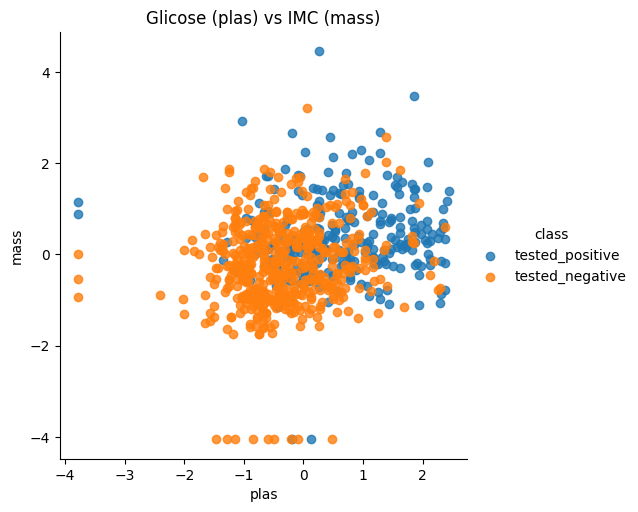

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot para plas vs mass, colorido pela classe
sns.lmplot(x='plas', y='mass', data=df, fit_reg=False, hue='class')
plt.title('Glicose (plas) vs IMC (mass)')
plt.show()

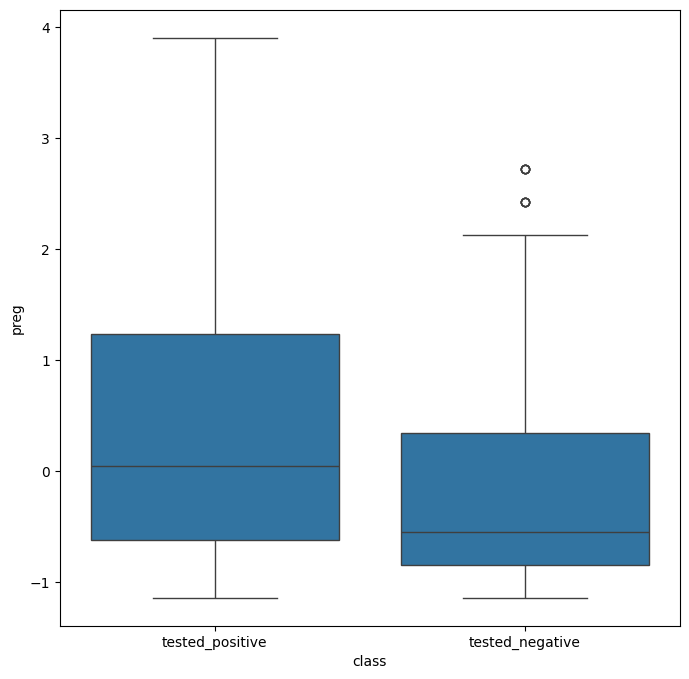

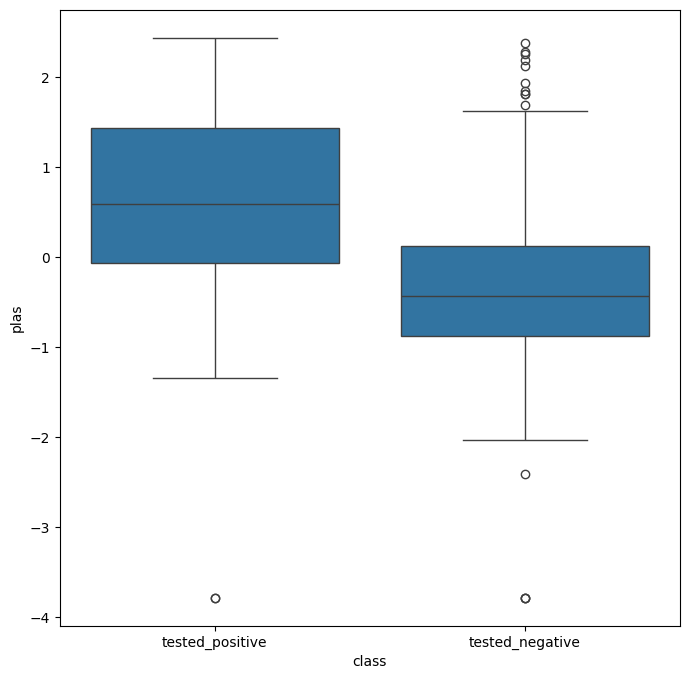

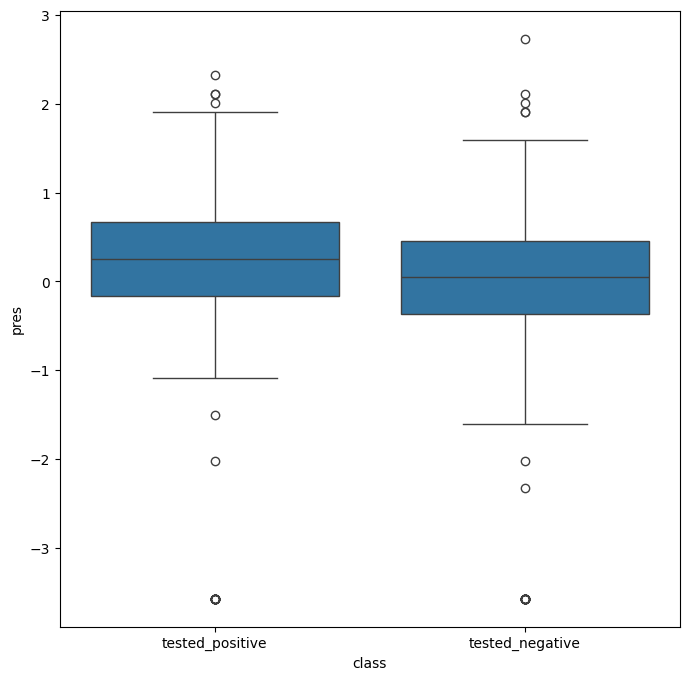

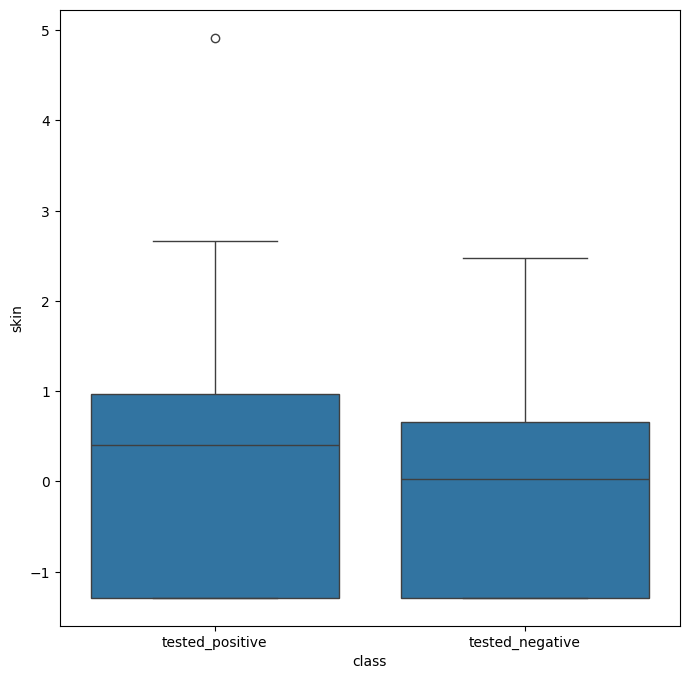

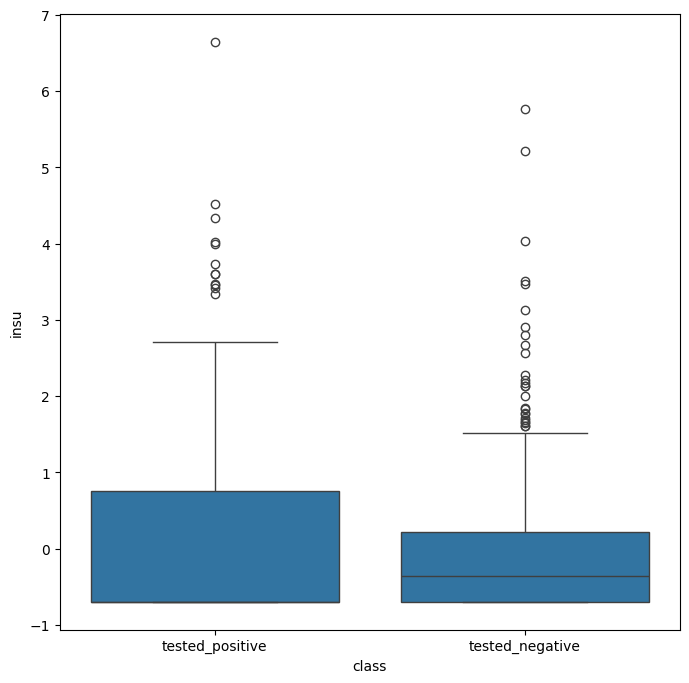

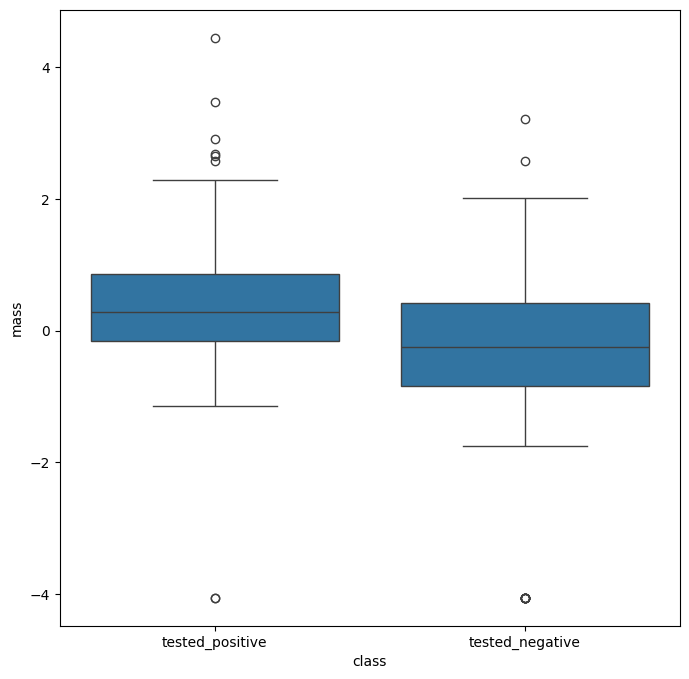

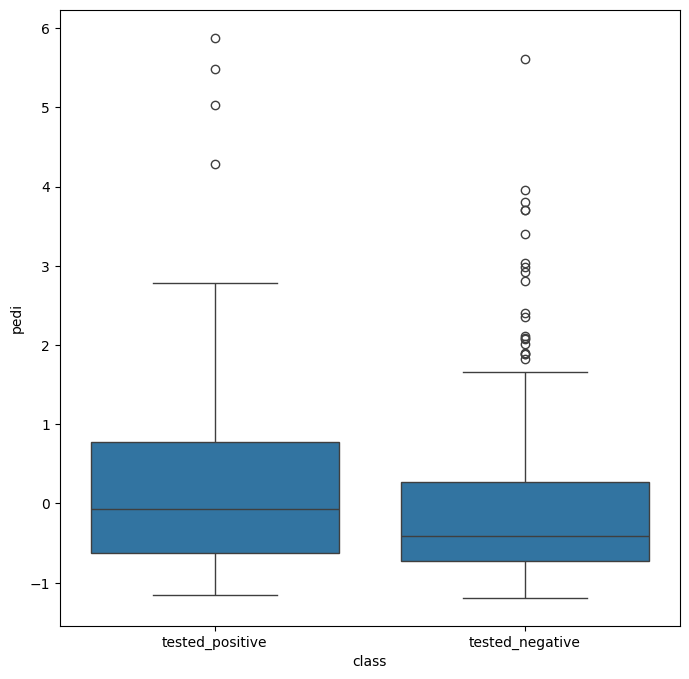

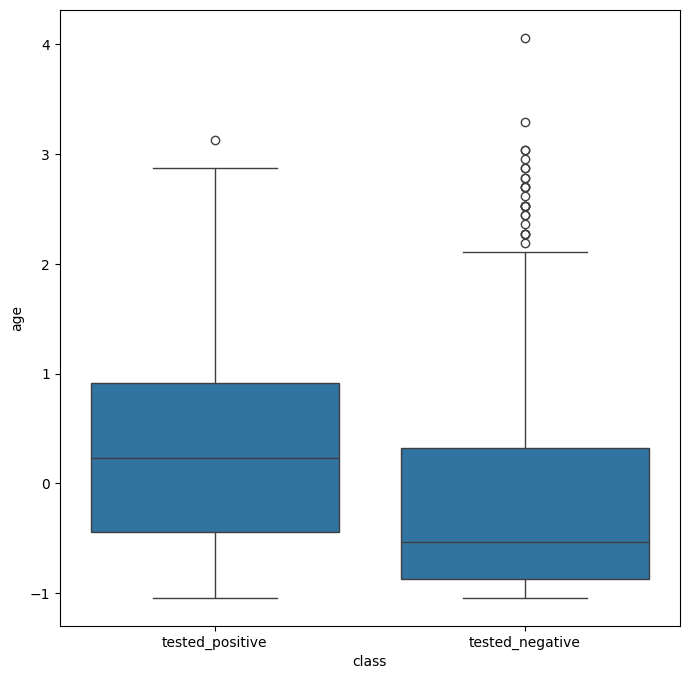

In [16]:
for atributo in df.columns[:-1]:
   # define a dimensão do gráfico
   plt.figure(figsize=(8,8))

   # cria o boxplot
   sns.boxplot(x="class", y=atributo, data=df, whis=1.5)

   # mostra o gráfico
   plt.show()

## Remove os outliers da base de dados

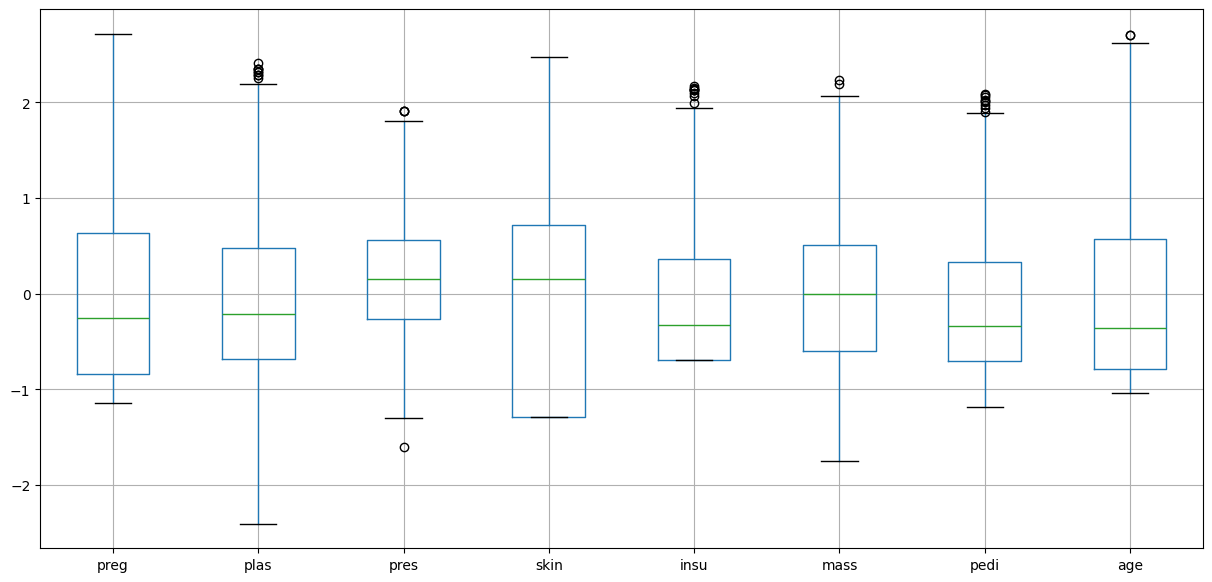

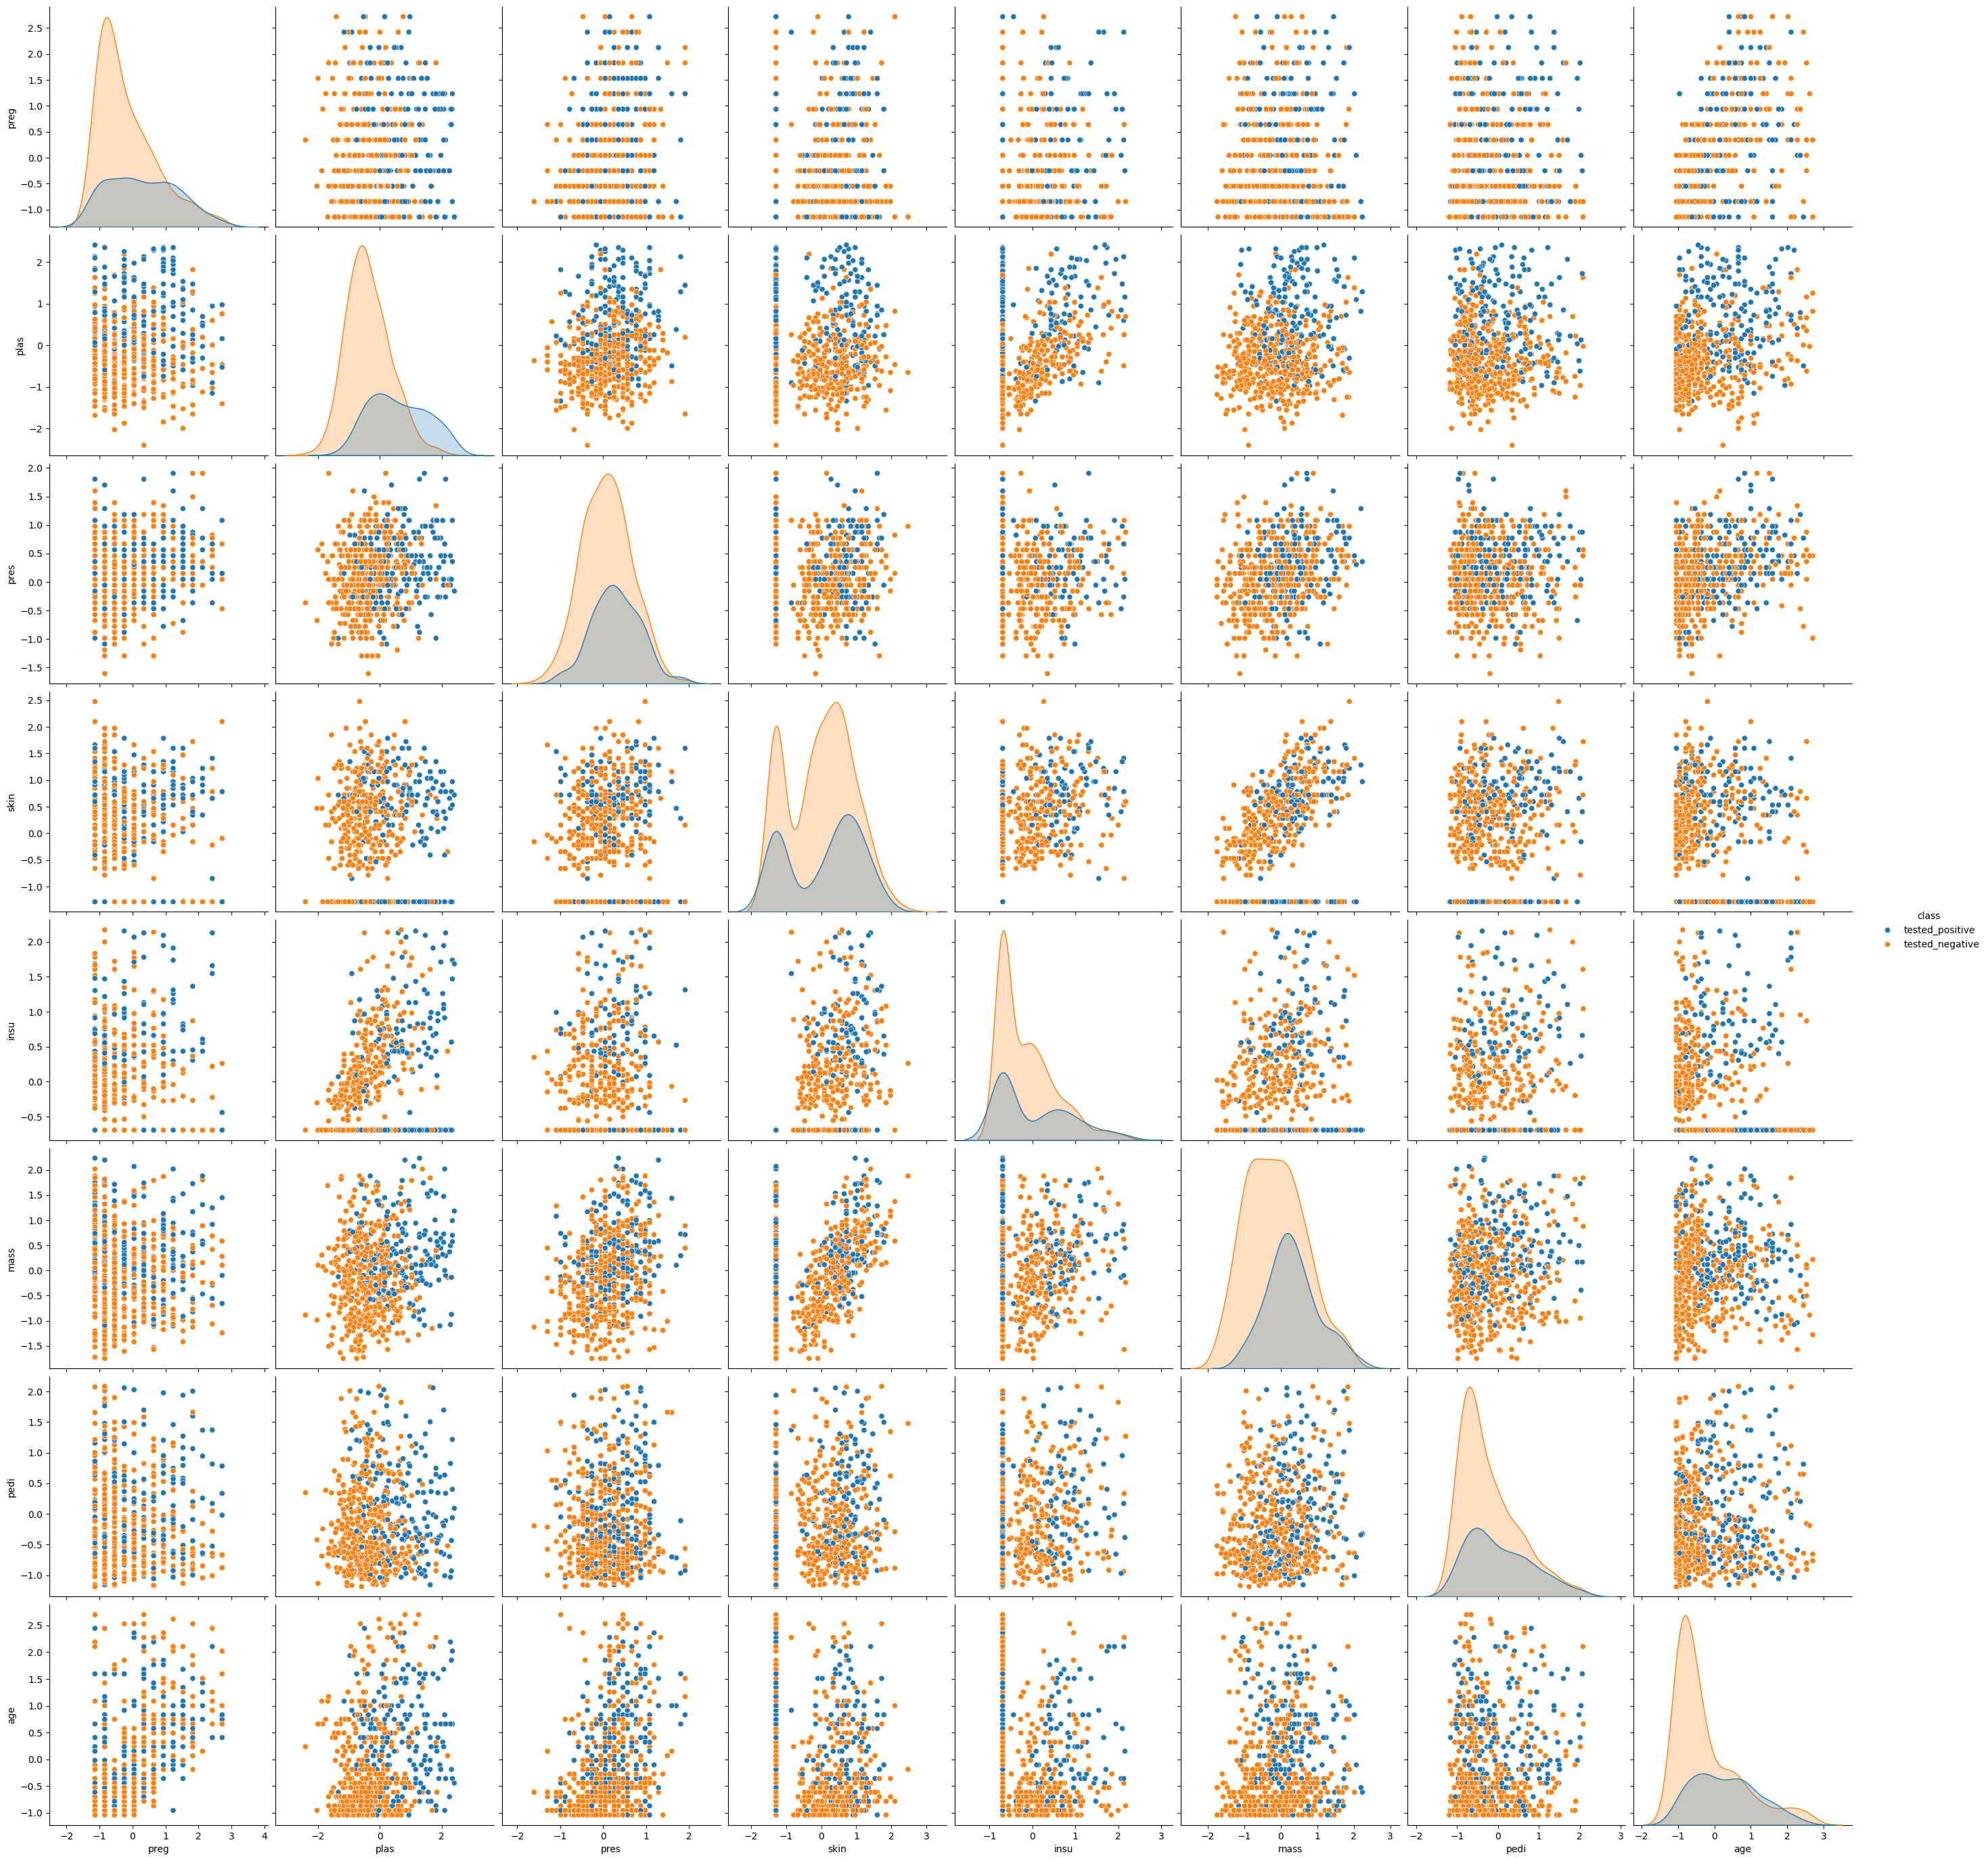

In [17]:
def removeOutliers(df):
    """
    Remove os outliers da base de dados
    """
    for atributo in df.columns[:-1]:
        q75, q25 = np.percentile(df[atributo].values, [75, 25])
        IQR = q75 - q25
        df = df[(df[atributo] <= (q75 + 1.5 * IQR)) & (df[atributo] >= (q25 - 1.5 * IQR))]
    return df

# remove os outliers
df = removeOutliers(df)

# apresenta as principais estatísticas sobre a base de dados
df.boxplot(figsize=(15,7))
plt.show()

# matriz de gráficos scatter (corrija o nome da coluna de classe se necessário)
import seaborn as sns
sns.pairplot(df, hue='class', height=3.5)
plt.show()

## Pré-processamento: distribuição das classes

class
tested_negative    439
tested_positive    197
Name: count, dtype: int64

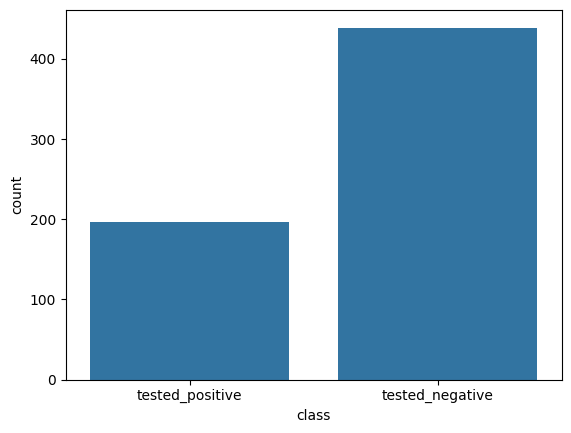

In [18]:
display(df['class'].value_counts())

# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="class", data=df)

# mostra o gráfico
plt.show()

## Pré-processamento: correlação entre os atributos

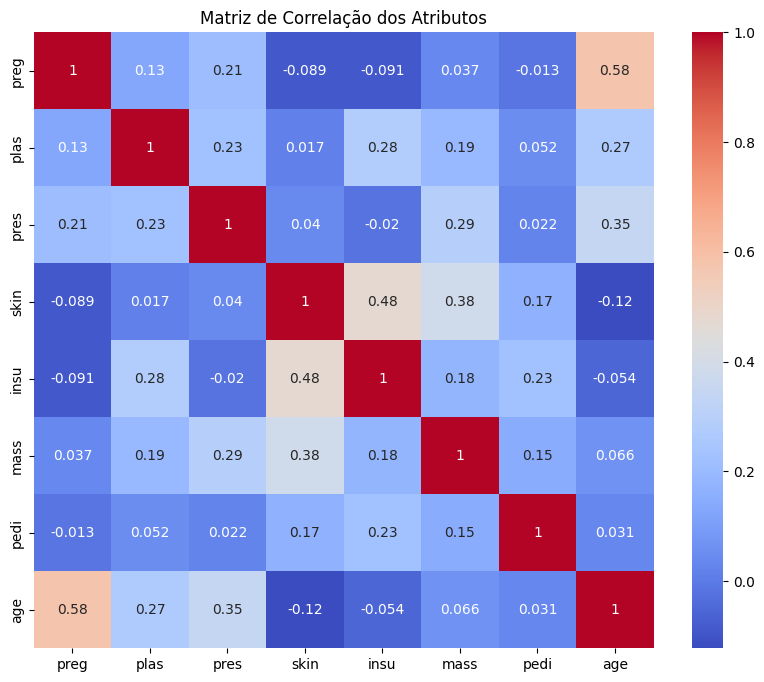

In [19]:
# criando uma matriz X com os valores do data frame
colunas = df.columns[:-1]
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', xticklabels=colunas, yticklabels=colunas)
plt.title('Matriz de Correlação dos Atributos')
plt.show()

### Definir o dr_correlation

In [20]:
df_values = df.drop(columns=['class'])
df_correlation = df_values.corr()

## Visualizar a matriz com um heatmap: Usar um mapa de calor facilita enxergar rapidamente quais atributos têm correlação forte (positiva ou negativa).

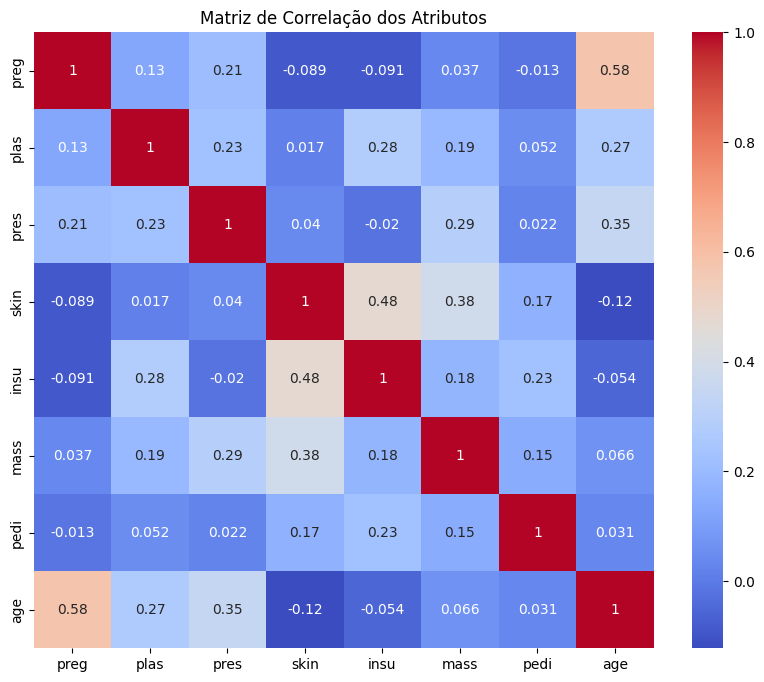

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df_correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação dos Atributos')
plt.show()

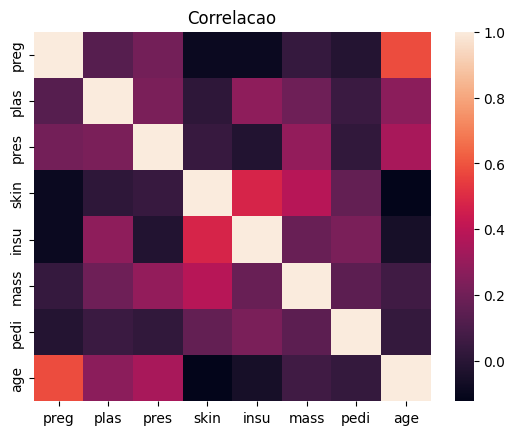

In [22]:
# cria um mapa de cores dos valores da correlação
sns.heatmap(
    df_correlation,
    xticklabels=df_correlation.columns,  # nomes das colunas no eixo x
    yticklabels=df_correlation.columns   # nomes das colunas no eixo y
)

plt.title('Correlacao')
plt.show()

# Resumo

Neste trabalho, realizamos o pré-processamento e a análise exploratória de dados (EDA) de um conjunto de dados, seguindo boas práticas de ciência de dados. Inicialmente, foi feita a remoção de outliers utilizando o método do IQR, o que permitiu reduzir possíveis distorções causadas por valores extremos. Em seguida, analisamos a distribuição das classes para avaliar o balanceamento do dataset, garantindo que as classes estavam representadas de forma adequada para análise e modelagem.

Também foi realizada a análise de correlação entre os atributos, tanto por meio de tabelas quanto de mapas de calor (heatmaps), facilitando a identificação de relações fortes ou fracas entre as variáveis. Esse diagnóstico é fundamental para entender possíveis redundâncias ou dependências entre os atributos, auxiliando na seleção de variáveis para futuros modelos de machine learning.

As etapas de visualização gráfica, como boxplots, scatterplots e gráficos de barras, permitiram observar as características principais dos dados de forma intuitiva. Todo o processo seguiu uma ordem lógica de preparação dos dados, tornando a base mais adequada e confiável para análises e modelagens posteriores.

--------------------------------------------------------------------------------


## Inicio do processo de extrações de padroes

---



Carregar as bibliotecas e os dados

In [23]:
from google.colab import drive
drive.mount('/content/drive')

!pip install liac-arff --quiet

import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

arff_path = '/content/drive/MyDrive/Datasets/diabetes.arff'
with open(arff_path, 'r') as f:
    dataset = arff.load(f)

df = pd.DataFrame(dataset['data'], columns=[a[0] for a in dataset['attributes']])
df['class'] = df['class'].map({'tested_positive': 1, 'tested_negative': 0})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Preparing metadata (setup.py) ... done


## Exploração dos dados

In [24]:
print(df.shape)
print(df.describe())
print(df.groupby('class').size())

(768, 9)
             preg        plas        pres        skin        insu        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

## Visualização dos dados

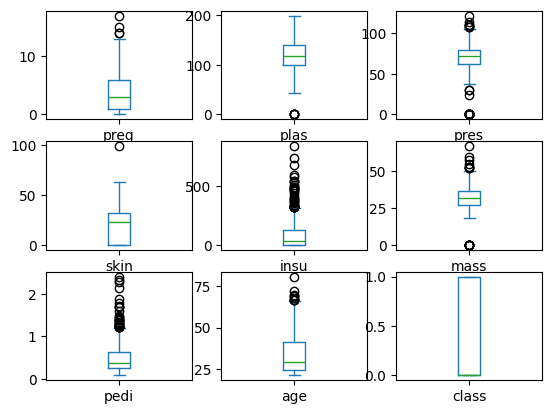

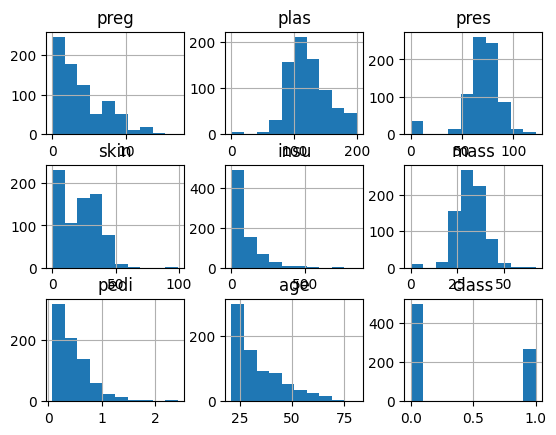

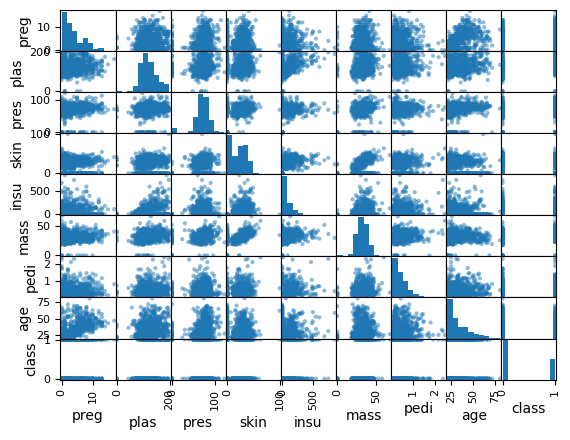

In [25]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

df.hist()
plt.show()

scatter_matrix(df)
plt.show()

## Separar treino e validação

In [26]:
array = df.values
X = array[:, 0:-1]  # Todas as colunas menos a última ('class')
Y = array[:, -1]    # Última coluna ('class')

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

print(X_train.shape)
print(Y_train.shape)
print(X_validation.shape)
print(Y_validation.shape)

(614, 8)
(614,)
(154, 8)
(154,)


## Treinar e comparar modelos

In [27]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)


models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.760947 (0.050121)
LDA: 0.770756 (0.058514)
KNN: 0.710206 (0.049772)
CART: 0.676150 (0.046747)
NB: 0.749418 (0.041042)
SVM: 0.656584 (0.052639)


## Comparar os algoritmos

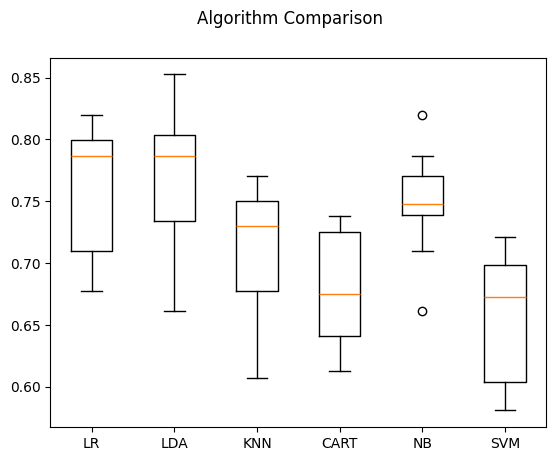

In [28]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Avaliar modelos no conjunto de validação

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7922077922077922
[[89  8]
 [24 33]]
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        97
         1.0       0.80      0.58      0.67        57

    accuracy                           0.79       154
   macro avg       0.80      0.75      0.76       154
weighted avg       0.79      0.79      0.78       154



## Testamos vários modelos, abaixo as precisões de cada um:

In [30]:
for i in range(len(names)):
    print(f"Precisão {names[i]}: {results[i].mean()*100:.2f}%")

Precisão LR: 76.09%
Precisão LDA: 77.08%
Precisão KNN: 71.02%
Precisão CART: 67.62%
Precisão NB: 74.94%
Precisão SVM: 65.66%


### O modelo com melhor desempenho foi o LDA, com 77,08% de acurácia. Ele se destacou por sua simplicidade e eficiência, indicando que os dados possuem boa separação linear. Modelos mais complexos como SVM e Árvores de Decisão tiveram desempenho inferior, possivelmente por overfitting ou necessidade de ajuste fino.

## Observações

### A base de dados utilizada contém dados reais de pacientes, o que envolve variabilidade e possíveis sobreposições entre as classes. Nesse contexto, o modelo LDA atingiu 77,08% de acurácia, o que representa um excelente resultado para esse tipo de problema, ficando acima da média de muitos estudos semelhantes na área da saúde.



## Gerando o joblib treinado

In [31]:
import joblib

# Suponha que seu melhor modelo seja o lda (LinearDiscriminantAnalysis)
# Treinando novamente só para garantir
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Salvar o modelo em um novo arquivo joblib
joblib.dump(lda, '/content/drive/MyDrive/Datasets/modelo_melhor.joblib')

['/content/drive/MyDrive/Datasets/modelo_melhor.joblib']